# Import library, load data

In [668]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from scipy.stats import norm, beta
import random as rand
from sklearn import metrics
plt.style.use('seaborn-poster')
np.set_printoptions(precision=2)  # 2 digits after .

%matplotlib inline


# define path
HOME_DATA_PATH = "./data/property.csv"
USER_ACTIVITY_PATH = "./data/user_activity.csv"
USER_ITEM_POINT_PATH = "./data/user_item_point.csv"


/var/folders/k4/prf0vszx12n66pskd9lk22q80000gn/T/ipykernel_40820/404395015.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


# Inspecting User's activities data

In [669]:
# display user's activities history data
activities = pd.read_csv(USER_ACTIVITY_PATH)
activities.head()


,item_id,user_id,event_type,create_timestamp
0,00062bc5-2535-4b1e-bbcb-228526c990b8,182aa519-83a8-848f-84a1-8697046d84c2,seen,2020-02-03 15:47:25.273977
1,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,seen,2020-02-04 20:19:31.040304
2,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,sent_catalog_link,2020-02-04 20:19:00.110416
3,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-canceled,2020-02-04 20:54:31.595305
4,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-new,2020-02-04 20:20:15.918646


In [670]:
activities.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323893 entries, 0 to 323892
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   item_id           323893 non-null  object
 1   user_id           323893 non-null  object
 2   event_type        323893 non-null  object
 3   create_timestamp  323893 non-null  object
dtypes: object(4)
memory usage: 9.9+ MB


# Inspecting homes data

In [671]:
# display homes data
homes = pd.read_csv(HOME_DATA_PATH)
home_orig = homes.copy()

homes.head()


,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0,0,263682f6-d0cd-4569-aeec-e727b76b7665,1.0,42,False,3.0,0.0,True,23.0
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0,4320000,97c9535e-3985-47ce-a84c-a962c838a76b,2.0,116,True,NaN,1.0,True,16.0
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0,1440000,b790f536-c274-4147-86e0-94d9b6d7352d,1.0,74,False,2.0,0.0,True,19.0
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000,93d06676-4975-4cc5-919b-3a0c29c7ad43,1.0,60,True,NaN,2.0,False,6.0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,1.0,45,True,NaN,1.0,True,4.0


In [672]:
homes.describe()


,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age
count,4.925000e+03,4.930000e+03,4927.000000,4930.000000,3282.000000,4893.000000,4926.000000
mean,8.321284e+07,1.052041e+06,1.471890,71.653347,3.970750,2.417127,13.651035
std,5.289941e+07,3.797125e+06,0.579431,22.890889,1.280667,3.496221,8.483931
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-2.000000,0.000000
25%,4.320000e+07,0.000000e+00,1.000000,55.000000,3.000000,1.000000,8.000000
50%,7.200000e+07,7.200000e+05,1.000000,67.000000,4.000000,2.000000,14.000000
75%,1.080000e+08,1.440000e+06,2.000000,84.000000,4.000000,3.000000,18.000000
max,4.320000e+08,1.440000e+08,5.000000,263.000000,16.000000,225.000000,99.000000


In [673]:
homes.info()
homes_with_points=home_orig.copy()
homes_with_points["points"]=0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               4930 non-null   object 
 1   deposit               4925 non-null   float64
 2   monthly_rent          4930 non-null   int64  
 3   district_uuid         4929 non-null   object 
 4   room_qty              4927 non-null   float64
 5   unit_area             4930 non-null   int64  
 6   has_elevator          4913 non-null   object 
 7   building_floor_count  3282 non-null   float64
 8   unit_floor            4893 non-null   float64
 9   has_storage_area      4920 non-null   object 
 10  property_age          4926 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 423.8+ KB


# Visualize Missing Value

In [674]:
# visualize missing value
missing_stats = {}
for col in homes.columns:
    if col =="item_id":
        continue
    missing_data_count = homes[col].isna().sum()
    missing_percent = round(missing_data_count/len(homes)*100, 2)
    missing_stats[col] = {
        "percent": missing_percent,
        "count": missing_data_count
    }
    display(
        f"Column {col}: has {missing_percent}% missing data with {missing_data_count} missing entries")


'Column deposit: has 0.1% missing data with 5 missing entries'

'Column monthly_rent: has 0.0% missing data with 0 missing entries'

'Column district_uuid: has 0.02% missing data with 1 missing entries'

'Column room_qty: has 0.06% missing data with 3 missing entries'

'Column unit_area: has 0.0% missing data with 0 missing entries'

'Column has_elevator: has 0.34% missing data with 17 missing entries'

'Column building_floor_count: has 33.43% missing data with 1648 missing entries'

'Column unit_floor: has 0.75% missing data with 37 missing entries'

'Column has_storage_area: has 0.2% missing data with 10 missing entries'

'Column property_age: has 0.08% missing data with 4 missing entries'

Text(0.5, 1.0, 'Missing value count by column')

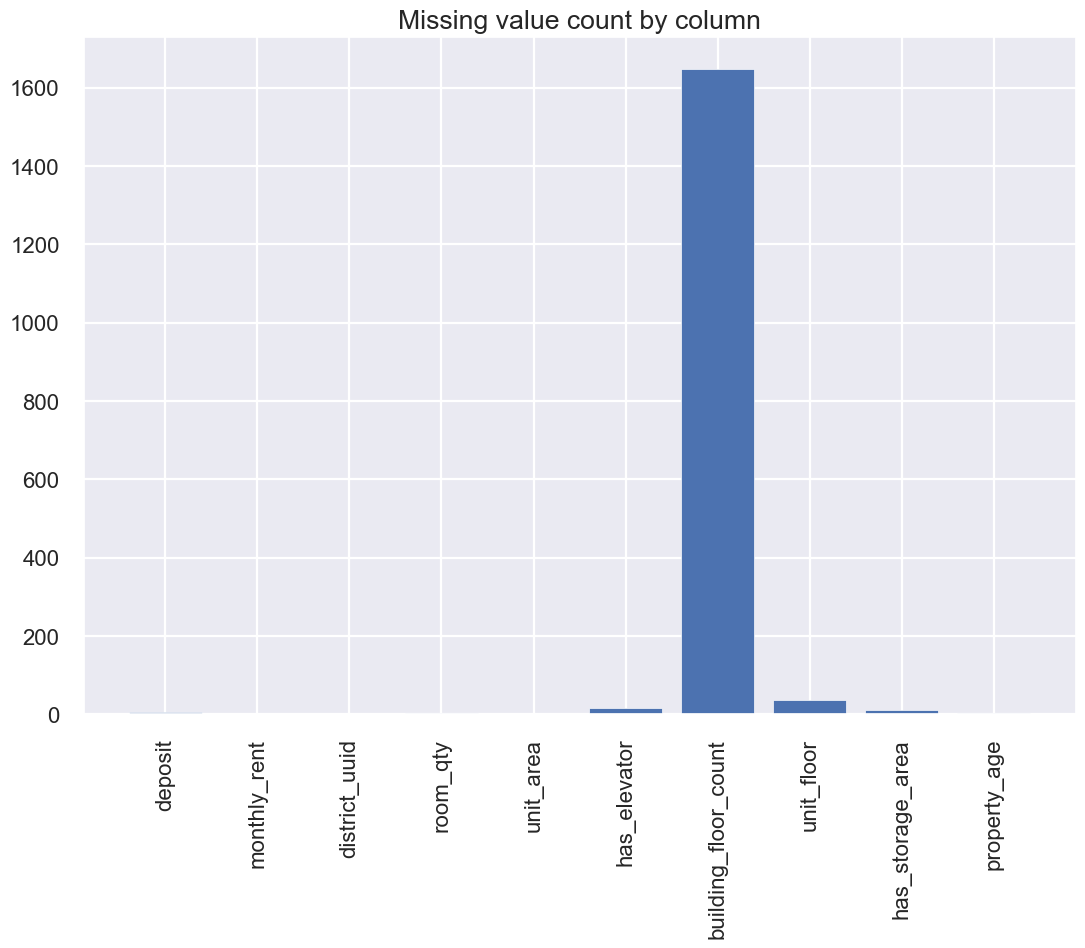

In [675]:
missing_x=missing_stats.keys()
missing_y_count=[x["count"] for x in missing_stats.values()]
missing_y_percent=[x["percent"] for x in missing_stats.values()]
plt.xticks(rotation=90)
plt.bar(x=missing_x,height=missing_y_count)
plt.title("Missing value count by column")


Text(0.5, 1.0, 'Missing value percentage by column')

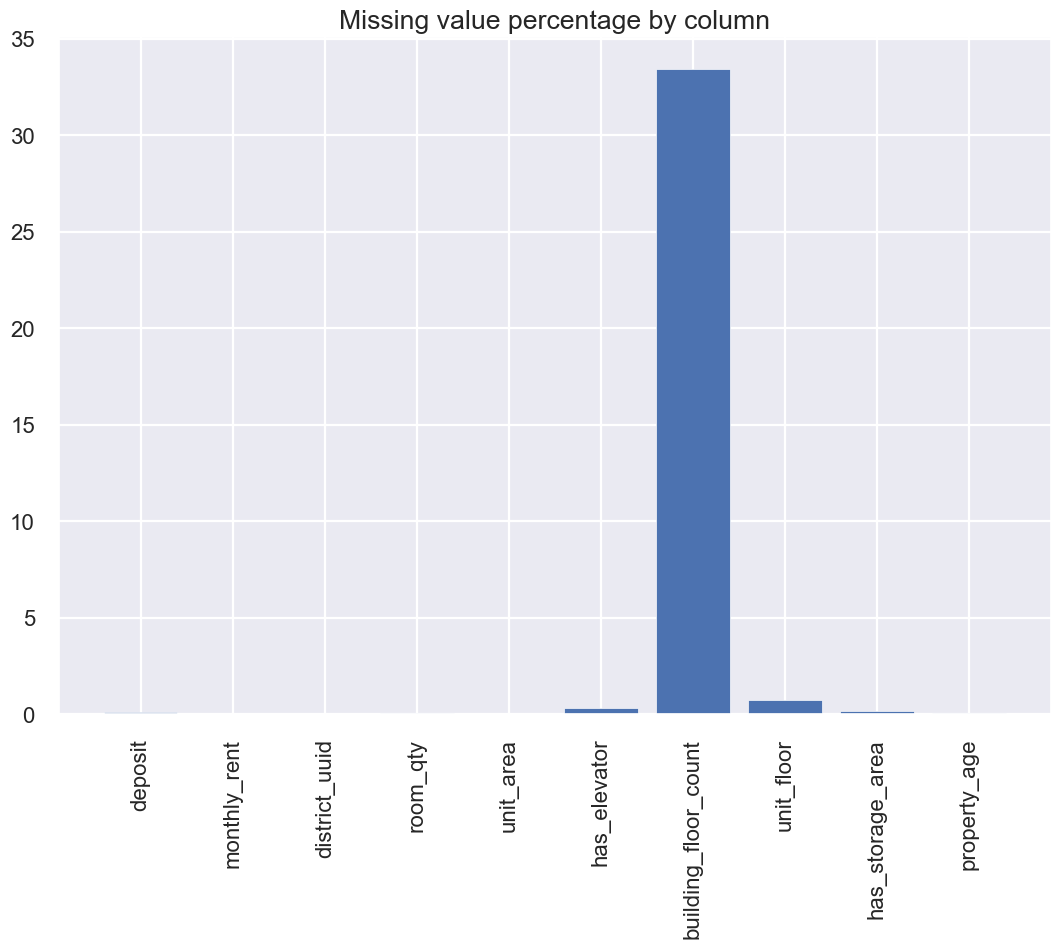

In [676]:
plt.xticks(rotation=90)

plt.bar(x=missing_x,height=missing_y_percent)
plt.title("Missing value percentage by column")


<AxesSubplot: >

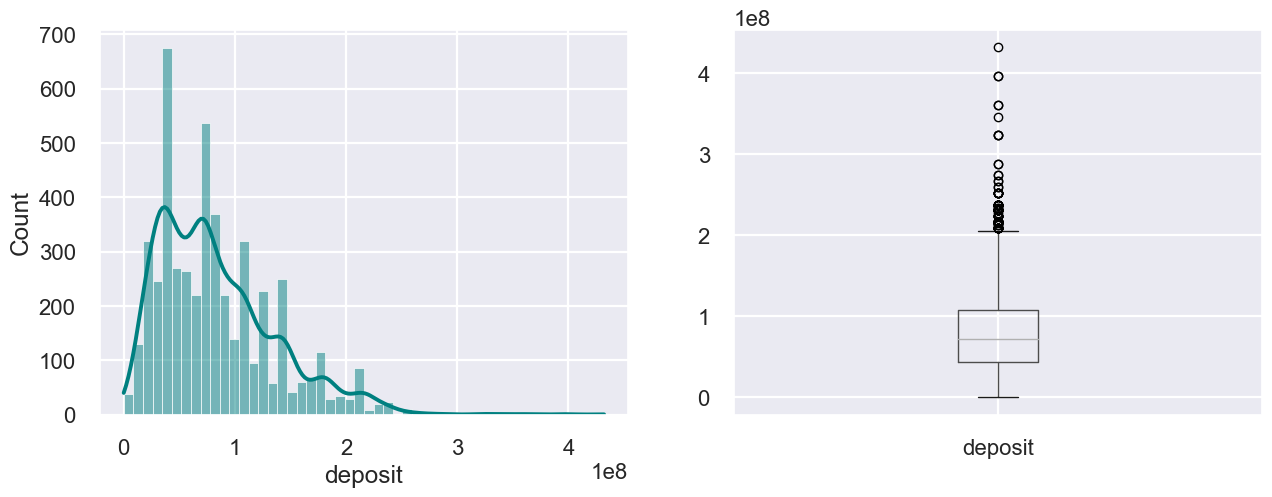

In [677]:
"""visualize deposit"""
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
deposit_data=homes[homes.deposit>0].deposit
sns.histplot(deposit_data, color='teal', kde=True, bins=50,ax=axes[0])
deposit_data.to_frame().boxplot(vert=True,ax=axes[1])

<AxesSubplot: >

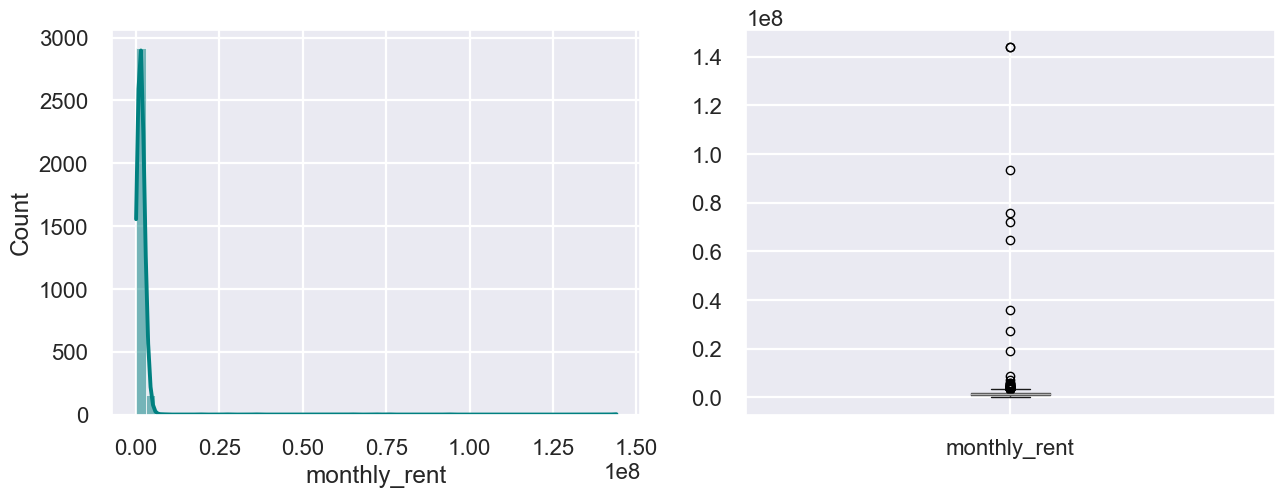

In [678]:
"""visualize monthly rent"""
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
monthly_rent_data=homes[homes.monthly_rent>0].monthly_rent
sns.histplot(monthly_rent_data, color='teal', kde=True, bins=50,ax=axes[0])
monthly_rent_data.to_frame().boxplot(vert=True,ax=axes[1])

<AxesSubplot: >

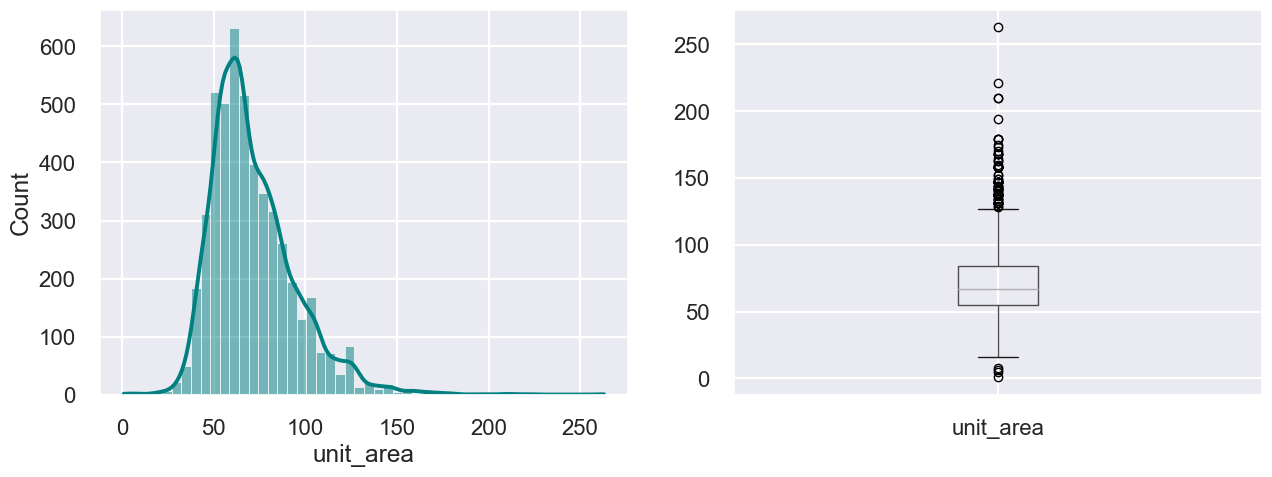

In [679]:
"""visualize unit area"""
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
unit_area_data=homes[homes.unit_area>0].unit_area
sns.histplot(unit_area_data, color='teal', kde=True, bins=50,ax=axes[0])
unit_area_data.to_frame().boxplot(vert=True,ax=axes[1])

<AxesSubplot: >

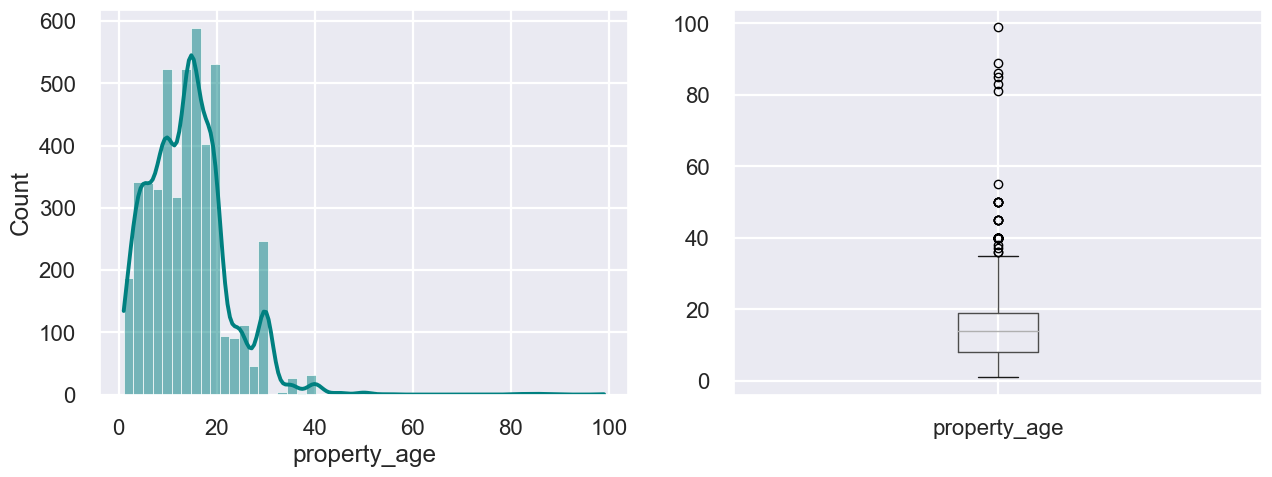

In [680]:
"""visualize property age"""
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
property_age_data=homes[homes.property_age>0].property_age
sns.histplot(property_age_data, color='teal', kde=True, bins=50,ax=axes[0])
property_age_data.to_frame().boxplot(vert=True,ax=axes[1])

/var/folders/k4/prf0vszx12n66pskd9lk22q80000gn/T/ipykernel_40820/3784418622.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=homes.corr()


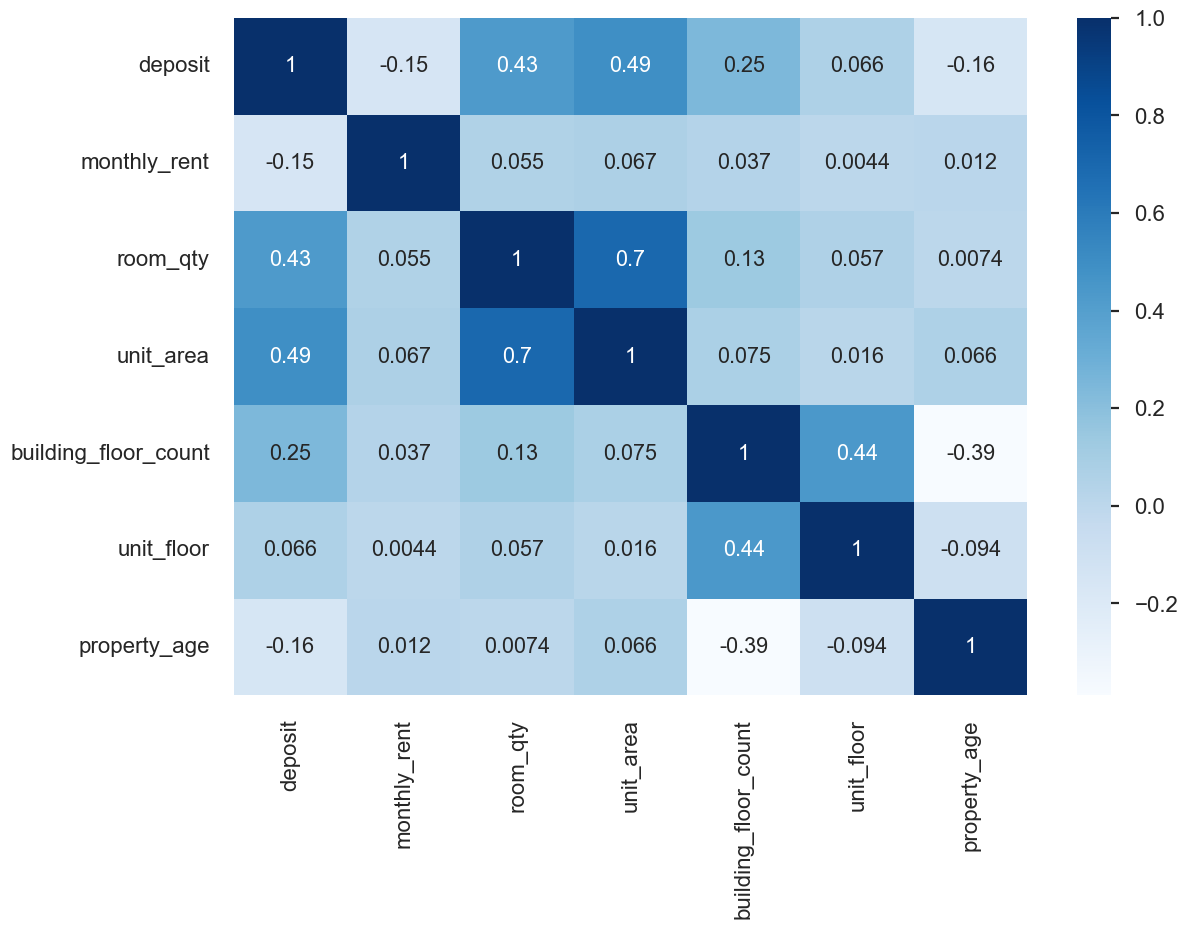

In [681]:
correlation=homes.corr()
sns.heatmap(data=correlation,annot=True,cmap="Blues")
plt.show()

In [682]:
# sanitize data
homes.drop(list(homes[homes.unit_area <=0].index), inplace=True)
homes.reset_index(drop=True, inplace=True)
homes.shape
homes.head()
orig_item_ids = homes["item_id"].values



In [683]:
from sklearn.preprocessing import *
cats = ['district_uuid', 'has_elevator', 'has_storage_area']

for c in cats:
    le = LabelEncoder()
    homes[c] = le.fit_transform(homes[c].astype('str'))
 
homes.head()


,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0,0,34,1.0,42,0,3.0,0.0,1,23.0
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0,4320000,102,2.0,116,1,NaN,1.0,1,16.0
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0,1440000,115,1.0,74,0,2.0,0.0,1,19.0
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000,100,1.0,60,1,NaN,2.0,0,6.0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000,74,1.0,45,1,NaN,1.0,1,4.0


In [684]:
feats = [c for c in homes.columns if c not in ['item_id']]
feats


['deposit',
 'monthly_rent',
 'district_uuid',
 'room_qty',
 'unit_area',
 'has_elevator',
 'building_floor_count',
 'unit_floor',
 'has_storage_area',
 'property_age']

In [685]:

home_orig_cleaned = homes.copy()

del homes['item_id']

homes.fillna(homes.mean(), inplace=True)
rb = StandardScaler()
home = rb.fit_transform(homes)
home = pd.DataFrame(home, columns=feats)
home.head()


,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,-0.349029,-0.277151,-1.332987,-0.816670,-1.299146,-0.734076,-9.289650e-01,-0.693991,0.717972,1.102223
1,-0.212798,0.860454,0.202577,0.911778,1.939700,1.322505,-8.499558e-16,-0.406897,0.717972,0.276448
2,-0.621491,0.102051,0.496140,-0.816670,0.101436,-0.734076,-1.885930e+00,-0.693991,0.717972,0.630352
3,-0.893953,-0.049630,0.157413,-0.816670,-0.511319,1.322505,-8.499558e-16,-0.119803,-1.368211,-0.903230
4,-1.030185,0.064130,-0.429715,-0.816670,-1.167842,1.322505,-8.499558e-16,-0.406897,0.717972,-1.139166


In [686]:


# remove rows that contains unused event
unused_events = [
    "seen_in_list",
    "suggest-new",
    "suggest_similar",
    "sent_catalog_link",
    # "visit_request-canceled",
    # "visit-canceled",
    # "meeting_request-canceled",
    # "meeting-canceled"
]

for event in unused_events:
    indexRows = activities[activities.event_type.str.contains(event)].index
    activities.drop(indexRows, inplace=True)
    activities.reset_index(drop=True, inplace=True)
display(activities.head())
#


,item_id,user_id,event_type,create_timestamp
0,00062bc5-2535-4b1e-bbcb-228526c990b8,182aa519-83a8-848f-84a1-8697046d84c2,seen,2020-02-03 15:47:25.273977
1,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,seen,2020-02-04 20:19:31.040304
2,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-canceled,2020-02-04 20:54:31.595305
3,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-new,2020-02-04 20:20:15.918646
4,00062bc5-2535-4b1e-bbcb-228526c990b8,69c257cd-8033-82aa-8950-8804a03c2ed1,seen,2020-02-05 10:18:54.229749


In [687]:
from pandas import DataFrame
import os


def assign_weight():
    # assign weight to events
    events_weight={
    "seen":20,
    "visit_request-new":30,
    "visit-new":30,
    "visit-unsuccess":-10,
    "visit-success":50,
    "meeting_request-new":70,
    "meeting-new":70,
    "meeting-unsuccess":70,
    "meeting-success":100,
    "deal-success":100,
    "visit_request-canceled":-10,
    "visit-canceled":-15,
    "meeting_request-canceled":-30,
    "meeting-canceled":-40,
    }
    users_items_points={}

    for _, activity in activities.iterrows():
        user_id=activity.user_id
        item_id=activity.item_id
        event_type=activity.event_type
        key=user_id+"-"+item_id
        if users_items_points.get(key)==None: 
            users_items_points[key]={
               "user_id": user_id,
                "item_id":item_id,
                "points":0
            }
         
        users_items_points[key]["points"]+=events_weight[event_type]
    
    pointDf= DataFrame(users_items_points.values())

    pointDf.to_csv(USER_ITEM_POINT_PATH,index=False)

if not os.path.isfile(USER_ITEM_POINT_PATH):
    assign_weight()

pointDf=pd.read_csv(USER_ITEM_POINT_PATH)
display(pointDf.head(5))





,user_id,item_id,points
0,182aa519-83a8-848f-84a1-8697046d84c2,00062bc5-2535-4b1e-bbcb-228526c990b8,20
1,189a081a-ae0f-499d-9092-01758d93fa7f,00062bc5-2535-4b1e-bbcb-228526c990b8,40
2,69c257cd-8033-82aa-8950-8804a03c2ed1,00062bc5-2535-4b1e-bbcb-228526c990b8,20
3,054f4d81-ee93-407c-af31-ff84c3a103a8,0019bb07-bb6d-44dd-b6b7-d1b5405338d2,20
4,08a44ae5-8419-88dd-8c61-8a9cd391677c,0019bb07-bb6d-44dd-b6b7-d1b5405338d2,20


In [688]:
import functools as ft
house_by_points=pointDf.groupby("item_id").sum("points")
dfs=[homes_with_points,house_by_points]
temp=ft.reduce(lambda left,right:pd.merge(left,right,on="item_id"),dfs)
temp.head()

"""
deposit,point
property_age,point
room qty
monthly rent
"""


'\ndeposit,point\nproperty_age,point\nroom qty\nmonthly rent\n'

<AxesSubplot: xlabel='deposit', ylabel='room_qty'>

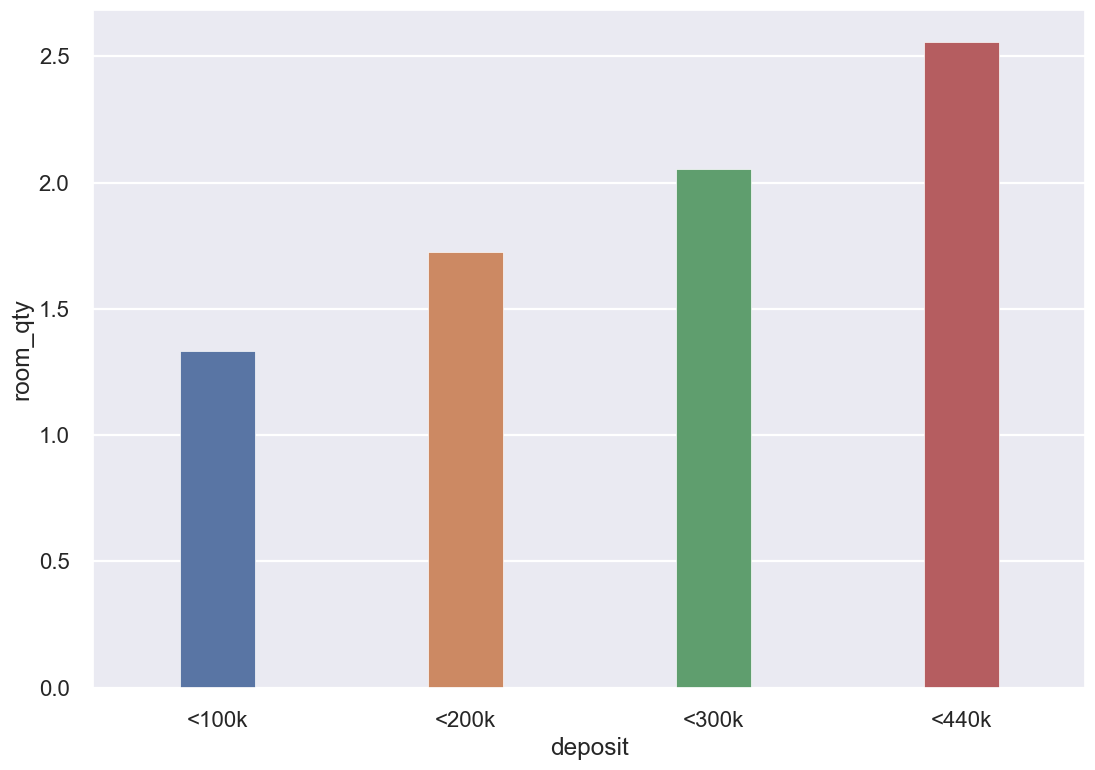

In [689]:
"""deposit - room_qty relationship	"""

bins=[0,100000000,200000000,300000000,440000000]
x=pd.cut(x=home_orig.deposit,bins=bins,labels=["<100k","<200k","<300k","<440k"])
deposit_room=home_orig.groupby(x)["room_qty"].mean().reset_index()
sns.barplot(x=deposit_room.deposit,y=deposit_room.room_qty,width=0.3)


<AxesSubplot: xlabel='deposit', ylabel='unit_area'>

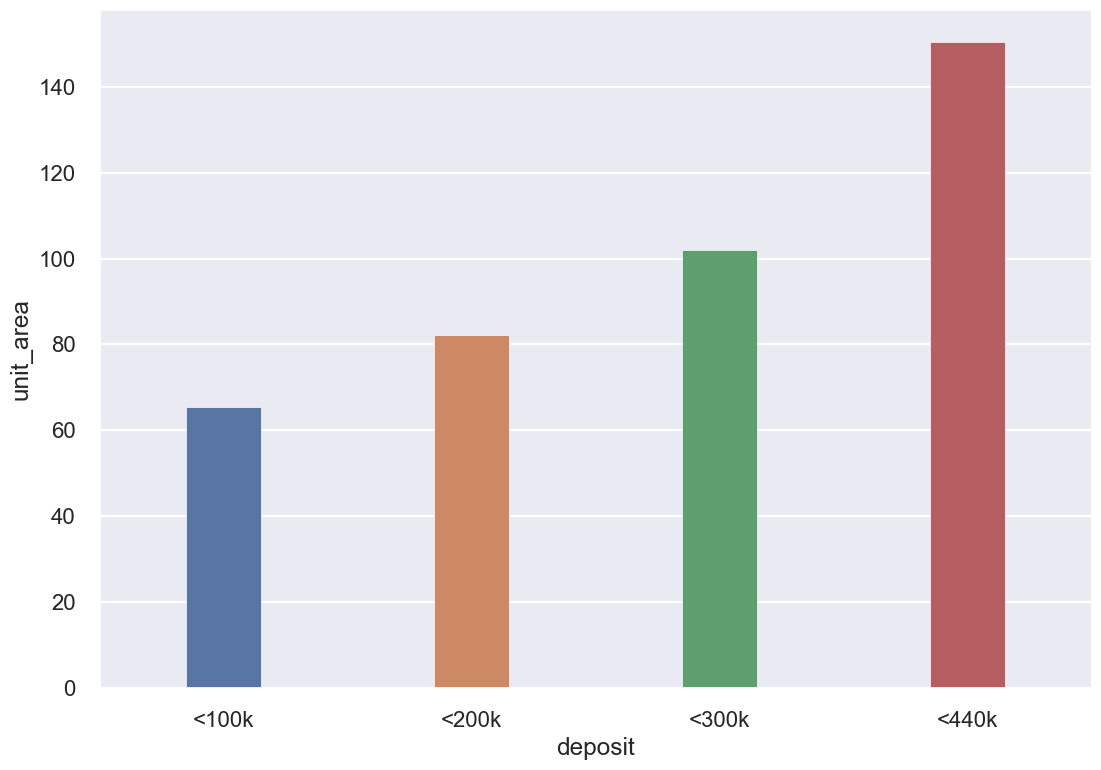

In [690]:
"""deposit - unit_area relationship	"""

bins=[0,100000000,200000000,300000000,440000000]
x=pd.cut(x=home_orig.deposit,bins=bins,labels=["<100k","<200k","<300k","<440k"])
deposit_room=home_orig.groupby(x)["unit_area"].mean().reset_index()
sns.barplot(x=deposit_room.deposit,y=deposit_room.unit_area,width=0.3)


<AxesSubplot: xlabel='unit_area', ylabel='room_qty'>

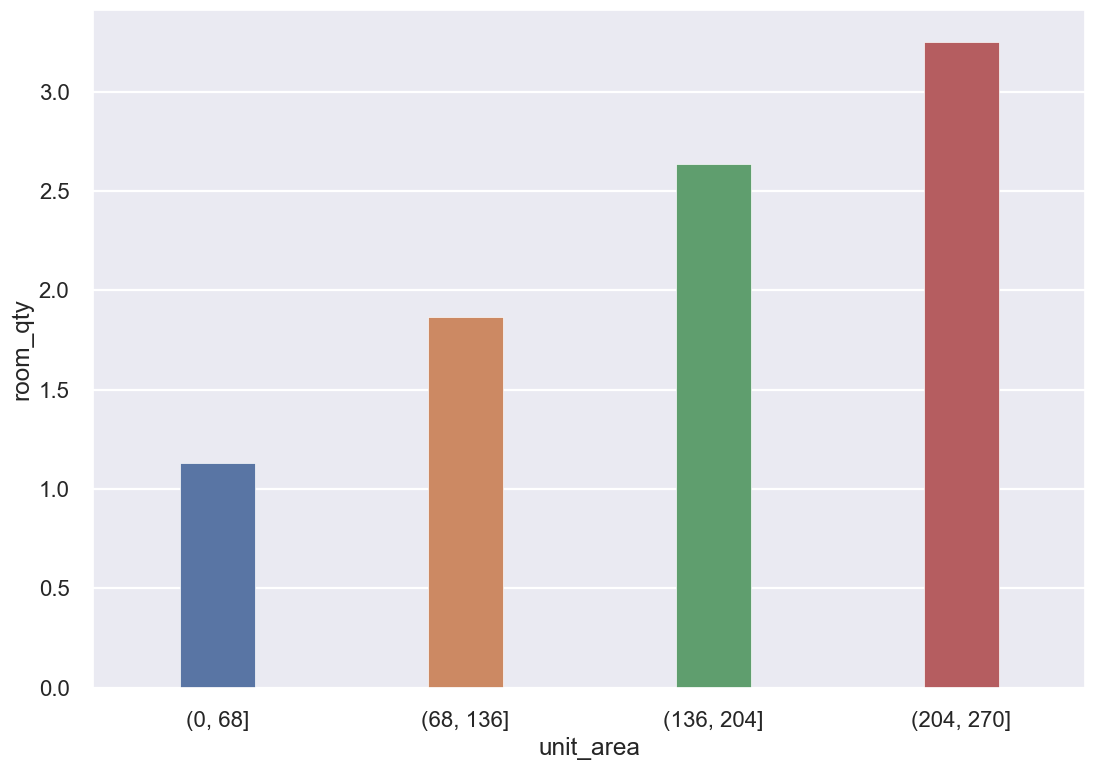

In [691]:
"""unit_area - room_qty relationship	"""

bins=[0,68,68*2,68*3,270]
x=pd.cut(x=home_orig.unit_area,bins=bins)
deposit_room=home_orig.groupby(x)["room_qty"].mean().reset_index()
sns.barplot(x=deposit_room.unit_area,y=deposit_room.room_qty,width=0.3)


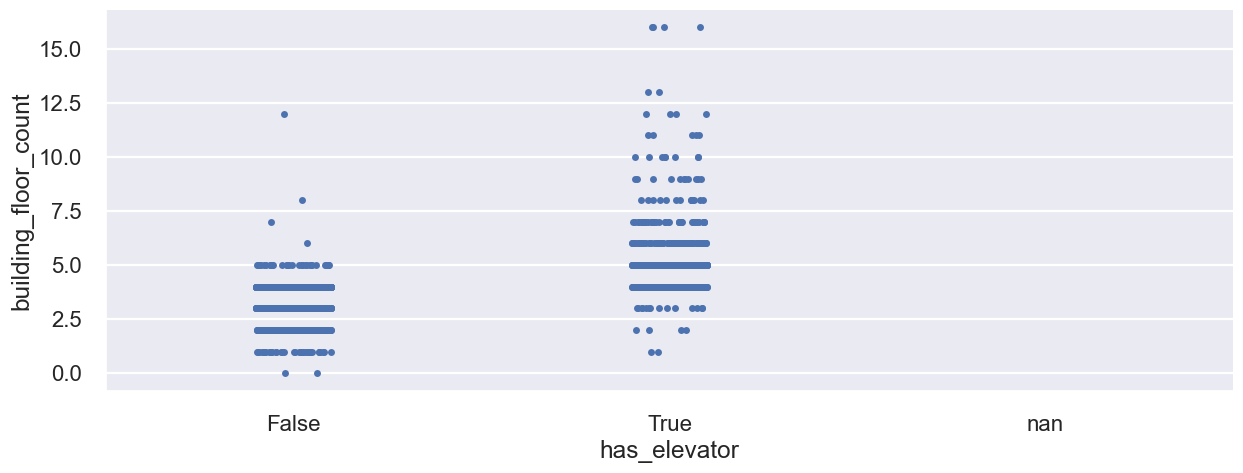

In [692]:
"""building floor count - has elevator relationship	"""
bfc_he=home_orig[["has_elevator","building_floor_count"]]
bfc_he.dropna()
g=sns.catplot(data=bfc_he,x="has_elevator",y="building_floor_count")
g.fig.set_size_inches(15,5)


In [693]:
"""find and remove invalid items"""
item_ids = np.unique(np.array(pointDf.item_id.values))

invalid_item_ids = [x for x in item_ids if x not in orig_item_ids]


print(f"found {len(invalid_item_ids)} ids that are not in property data")


pointDf.drop(pointDf[pointDf.item_id.isin(
    invalid_item_ids)].index, inplace=True)
pointDf.reset_index(drop=True, inplace=True)

# display(orig_item_ids)
# display(home_orig[np.where(home_orig.item_id.isin(item_ids)==False)])


found 2 ids that are not in property data


In [694]:
point_matrix = pointDf.values

user_id_nums={}
user_id_nums_rev={}
item_id_nums={}
item_id_nums_rev={}
for index,row in list(enumerate(point_matrix)):
    user_id=row[0]
    item_id=row[1]
    point=row[2]
    if user_id_nums.get(user_id) ==None:
        user_id_nums[user_id]=len(user_id_nums.keys())
        user_id_nums_rev[user_id_nums[user_id]]=user_id
    if item_id_nums.get(item_id) ==None:
        item_id_nums[item_id]=len(item_id_nums.keys())
        item_id_nums_rev[item_id_nums[item_id]]=item_id
        
points_train, points_test = train_test_split(point_matrix, test_size=0.2)
print(points_train.shape)
print(points_test.shape)


(76998, 3)
(19250, 3)


In [695]:
input_cols = ["deposit", "monthly_rent", "room_qty", "unit_area", "has_elevator",
              "build_floor_count", "unit_floor", "has_storage", "property_age"]
homes.head()


,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,64800000.0,0,34,1.0,42,0,3.000000,0.0,1,23.0
1,72000000.0,4320000,102,2.0,116,1,3.970741,1.0,1,16.0
2,50400000.0,1440000,115,1.0,74,0,2.000000,0.0,1,19.0
3,36000000.0,864000,100,1.0,60,1,3.970741,2.0,0,6.0
4,28800000.0,1296000,74,1.0,45,1,3.970741,1.0,1,4.0


In [696]:
"""get top 10 house by sum of point"""

'get top 10 house by sum of point'

In [697]:
def get_items_point_by_user(point_matrix, user_id):
    "all user id"
    y = point_matrix[:, 0]
    # get rows where user_id == input user_id
    filtered = point_matrix[np.where(y == user_id)]
    item_ids = filtered[:, 1].flatten()
    points = filtered[:, 2].flatten()
    return (item_ids, points)


# Train decision tree

In [698]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

users=point_matrix[:,0]
mu = np.zeros((len(users),))
normalized_points=point_matrix.copy()
for n in users:            # row indices of ratings made by user n
   ids = np.where(users == n)[0]
   item_points =point_matrix[ids, 2]
   # avoid zero division
   uid_numeric=user_id_nums[n]
   mu[uid_numeric] = np.mean(item_points) if ids.size > 0 else 0
   normalized_points[ids, 2] = item_points - mu[uid_numeric]


In [699]:

unique_user_id_train = np.unique(points_train[:, 0])
unique_user_id_test = np.unique(points_test[:, 0])

n_users = len(unique_user_id_train)
dt_trained_models={}
threshold=0
for uid in unique_user_id_train:
    ids, points = get_items_point_by_user(
        normalized_points,uid)
    clf = DecisionTreeClassifier(max_depth=3)
    Xhat = home[home_orig_cleaned.item_id.isin(ids)]
    if len(Xhat) ==0:
        continue;
    clf.fit(Xhat, points>threshold)
    
    dt_trained_models[uid]=clf


# Eval Decision tree

In [700]:
test_lab=[]
test_pred_decision_tree=[]
longest_id=""
longest_id_count=0
for uid in unique_user_id_test:
    #print(f"start training for user: {unique_user_id_train[n]}")
        # uid=56
    ids, points = get_items_point_by_user(points_test, uid)
    
    if len(ids)>longest_id_count:
        longest_id_count=len(ids)
        longest_id=uid

    # x_test_dt=home[home_orig.item_id.isin(ids)]
    if dt_trained_models.get(uid) == None:
        continue
    selected_model=dt_trained_models[uid]
    predicted=selected_model.predict(home[home_orig_cleaned.item_id.isin(ids)])
    test_lab.extend(predicted)
    test_pred_decision_tree.extend(points>threshold)

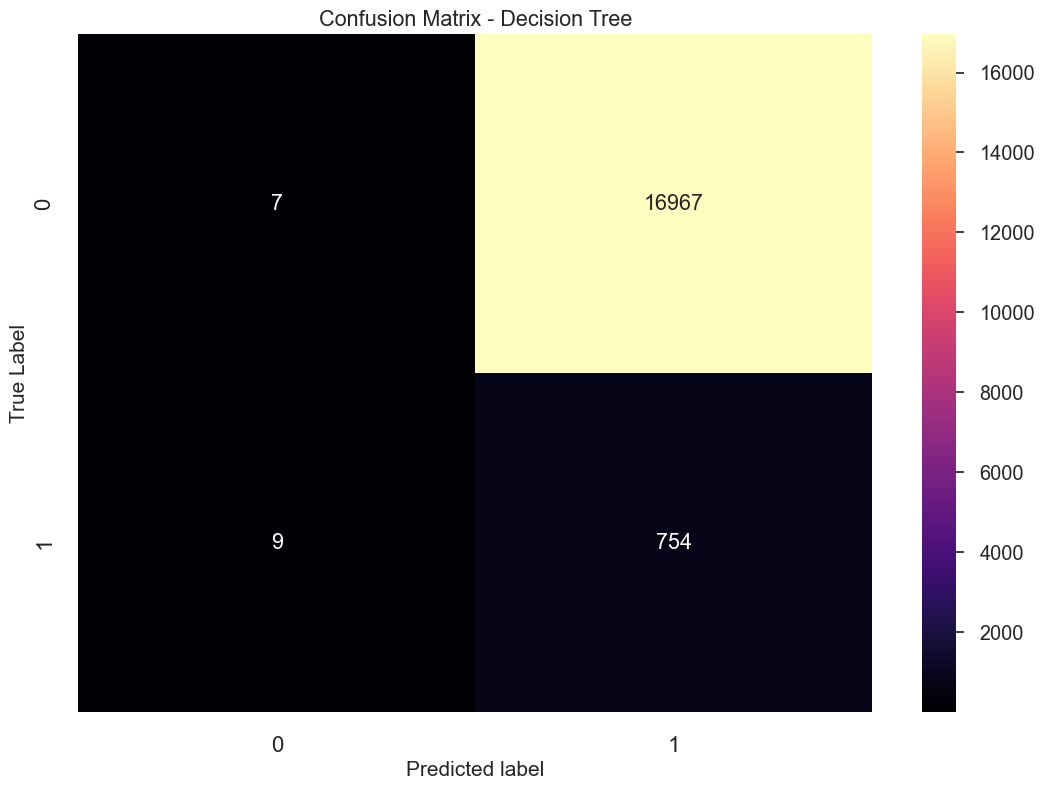

<Figure size 1000x700 with 0 Axes>

In [701]:

labels=["not like","like"]
confusion_matrix = metrics.confusion_matrix(test_lab,  
                                            test_pred_decision_tree)#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
# ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
# ax.set_yticklab/els(list(labels), rotation = 0)
plt.show()

In [702]:
print(metrics.classification_report(test_lab,
                                    test_pred_decision_tree))

              precision    recall  f1-score   support

       False       0.44      0.00      0.00     16974
        True       0.04      0.99      0.08       763

    accuracy                           0.04     17737
   macro avg       0.24      0.49      0.04     17737
weighted avg       0.42      0.04      0.00     17737



In [703]:
uid=unique_user_id_train[rand.randint(0,len(unique_user_id_train)-1)]
#40c034e8-032a-4f88-a684-26d85cc28e19

print(uid)
ids, points = get_items_point_by_user(points_test, uid)


# x_test_dt=home[home_orig.item_id.isin(ids)]

selected_model=dt_trained_models[uid]
predicted=selected_model.predict(home)
print(predicted.sum())

41514385-afd3-49a5-ad26-e9f567fc970f
0


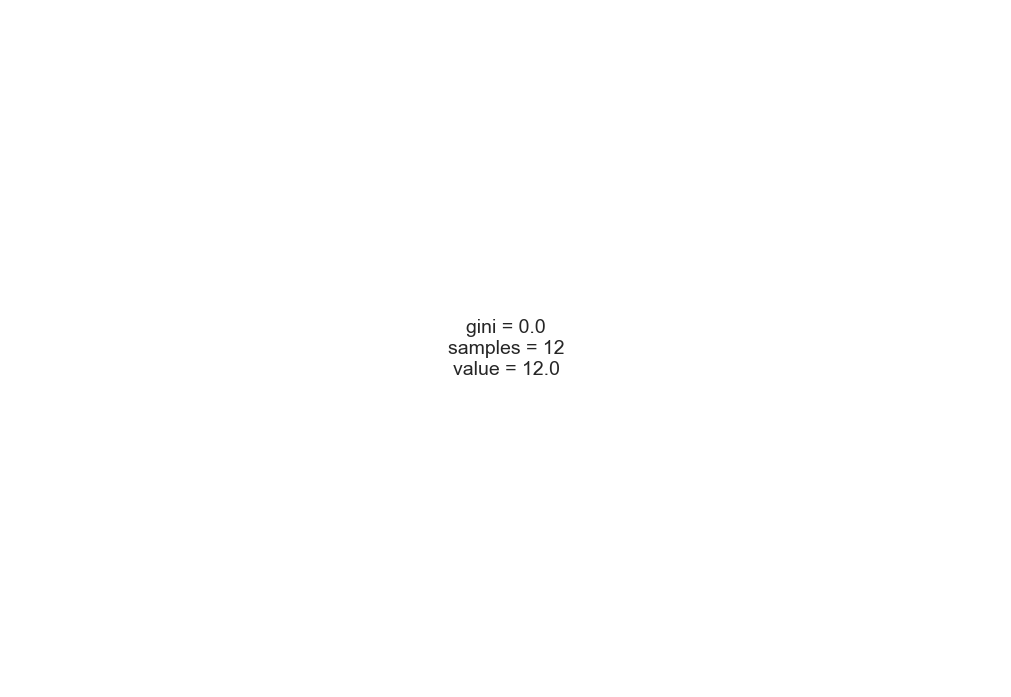

In [704]:
from sklearn import tree
import matplotlib.pyplot as plt

dt_visualize_model=dt_trained_models[uid]
a = tree.plot_tree(dt_visualize_model,
                   feature_names = home.columns,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

# Content-based filtering

In [705]:
"""train ridge model"""
from sklearn.linear_model import Ridge
from sklearn import linear_model


unique_user_id_train = np.unique(points_train[:, 0])

n_users = len(unique_user_id_train)

d = home.shape[1]  # data dimension
W = np.zeros((d, n_users))
b = np.zeros((1, n_users))

for n in range(n_users):
    #print(f"start training for user: {unique_user_id_train[n]}")
    ids, points = get_items_point_by_user(
        points_train, unique_user_id_train[n])

    clf = Ridge(alpha=0.01, fit_intercept=True)
    Xhat = home[home_orig_cleaned.item_id.isin(ids)]
    clf.fit(Xhat, points)
    trained_weight = clf.coef_
    trained_b = clf.intercept_
    W[:, n] = trained_weight
    b[0, n] = trained_b
    # if len(ids) > 10:
    #     # n_house x 2
    #     print(Xhat.dot(trained_weight) + trained_b)


In [706]:
#cols: users
#rows: houses
# value: predicted point
Yhat = np.array(home.dot(W) + b)
print(Yhat.shape)
print(home.shape)
print(W.shape)


(4928, 15500)
(4928, 10)
(10, 15500)


In [707]:
unique_user_id_test = np.unique(points_test[:, 0])

real_points=np.array([],dtype="float64")
pred_points=np.array([],dtype="float64")
for i in range(len(unique_user_id_test)-1):
    n = i
    ids, points = get_items_point_by_user(points_test, unique_user_id_test[n])
    id_indexs = home[home_orig_cleaned.item_id.isin(ids)].index.tolist()
    pred_points=np.append(pred_points,Yhat[id_indexs, n])
    real_points=np.append(real_points,points)
    # if len(ids) > 10:
    #     print("For user: ", unique_user_id_test[n])
    #     print('Rated real estate ids :', ids)
    #     print('True ratings     :', points)
    #     print('Predicted ratings:', Yhat[id_indexs, n])


    #     print('Predicted ratings for the first 100 items:', Yhat[0:100, n])

    #     print("\n-------\n")


print('Content-based Filtering RMSE: ', metrics.mean_squared_error(
            pred_points,real_points, squared=False),)
print('Content-based Filtering MSE: ', metrics.mean_squared_error(
            pred_points,real_points, squared=True),)
print('Content-based Filtering MAE: ', mean_absolute_error(pred_points,real_points))


Content-based Filtering RMSE:  35.487075410003136
Content-based Filtering MSE:  1259.3325211552492
Content-based Filtering MAE:  7.995207571363451


# Collaborative filtering

In [708]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse


class CollaborativeFiltering(object):
    def __init__(self, Y_data, k, sim_func=cosine_similarity,item_based=False):
        points_copy=Y_data.copy()
        for index,row in list(enumerate(Y_data)):
            point=row[2]
            if not item_based:
                user_id=row[0]
                item_id=row[1]
                points_copy[index]=[user_id_nums[user_id],item_id_nums[item_id],point]      
            else:
                user_id=row[1]
                item_id=row[0]
                points_copy[index]=[item_id_nums[item_id],user_id_nums[user_id],point]      

        self.Y_data = points_copy  # a 2d array of shape (n_users, 3)
        # each row of Y_data has form [user_id, item_id, rating]
        self.k = k  # number of neighborhood
        self.sim_func = sim_func  # similarity function, default: cosine_similarity
        self.Ybar = None  # normalize data
        self.n_users = len(self.Y_data[:,0])  # number of users
        self.n_items = len(self.Y_data[:,1])  # number of items

    def fit(self):

        # normalized Y_data -> Ybar
        users = self.Y_data[:, 0]  # all users - first column of Y_data
        self.Ybar = self.Y_data.copy()
        self.mu = np.zeros((self.n_users,))
        for n in users:
            # row indices of ratings made by user n
            ids = np.where(users == n)[0].astype(np.int32)
            # indices of all items rated by user n
            item_ids = self.Y_data[ids, 1]
            # ratings made by user n
            ratings = self.Y_data[ids, 2]
            # avoid zero division
            self.mu[n] = np.mean(ratings) if ids.size > 0 else 0
            self.Ybar[ids, 2] = ratings - self.mu[n]
        data=np.array(self.Ybar[:,2],dtype="float64")
        row=np.array(self.Ybar[:,1],dtype="int64")
        col=np.array(self.Ybar[:,0],dtype="int64")

        self.Ybar = sparse.coo_matrix((data,
                                        (row, col)), (self.n_items, self.n_users)).tocsr()
        self.S = self.sim_func(self.Ybar.T, self.Ybar.T)

    def pred(self, u, i):
        """ predict the rating of user u for item i"""
        # find item i
        ids = np.where(self.Y_data[:, 1] == i)[0].astype(np.int32)
        # all users who rated i
        users_rated_i = (self.Y_data[ids, 0]).astype(np.int32)
        # similarity of u and users who rated i
        sim = self.S[u, users_rated_i]
        # most k similar users
        nns = np.argsort(sim)[-self.k:]
        nearest_s = sim[nns]  # and the corresponding similarities
        # the corresponding ratings
        r = self.Ybar[i, users_rated_i[nns]]
        eps = 1e-8  # a small number to avoid zero division
        return (r*nearest_s).sum()/(np.abs(nearest_s).sum() + eps) + self.mu[u]


In [709]:
#eval func
def eval_cf(cf_model,test_set,item_based=False):
    n_tests = test_set.shape[0]
    real_points=np.array([],dtype="float64")
    pred_points=np.array([],dtype="float64")
    SE = 0 # squared error
    for n in range(n_tests):
        if not item_based:
            pred = cf_model.pred(user_id_nums[test_set[n, 0]], item_id_nums[test_set[n, 1]])
        else:
            pred = cf_model.pred(item_id_nums[test_set[n, 0]], user_id_nums[test_set[n, 1]])
        real_points=np.append(real_points,test_set[n, 2])
        pred_points=np.append(pred_points,pred)

    RMSE=mean_squared_error(
            pred_points,real_points, squared=False)
    MSE=mean_squared_error(
            pred_points,real_points)
    MAE=mean_absolute_error(pred_points,real_points)
    return  RMSE, MSE,MAE

In [710]:
def get_top_items(cf_model,user_id,n_top_items=7,item_based=False):
    pred_points=np.array([],dtype="float64")
    for item_id in home_orig_cleaned.item_id.values:
        if not item_based:
            left_param=user_id_nums.get(user_id)
            right_param=item_id_nums.get(item_id)
        else:
            right_param=user_id_nums.get(user_id)
            left_param=item_id_nums.get(item_id)

        if left_param == None or right_param == None:
            continue
        pred=cf_model.pred(left_param,right_param)
        pred_points=np.append(pred_points,pred)
    top_item_indexes=np.argpartition(pred_points, -n_top_items)[-n_top_items:]
    top_item_indexes_sorted=top_item_indexes[np.argsort(pred_points[top_item_indexes])][::-1]
    print("Top points: ",pred_points[top_item_indexes_sorted])
    return home_orig_cleaned.iloc[top_item_indexes_sorted].item_id

## User-based collaborative filtering

In [711]:
#user-based
user_based_cf = CollaborativeFiltering(points_train, k = 3)
user_based_cf.fit()



In [712]:
user_based_cf_recommedation_result=get_top_items(user_based_cf,user_id="006842a9-8da3-4e9a-9a23-68535983aee0",item_based=False)
print(user_based_cf_recommedation_result)


Top points:  [286.65 256.9  194.35 181.98 179.58 155.29 142.5 ]
540     6190bb27-d2b7-4eb5-8f9d-3b8d15ed5f8b
2031    730c20b1-d65f-4c7b-b3f4-10fc45f1391b
1874    7869cbd0-3f19-4ced-8fff-5b1b84f0be51
1625    dfe9dc53-64d6-4836-9c5b-f7d5264fd8f3
3445    c5417381-6dbc-4b3b-b291-3de442512533
870     c6b7b81b-2d81-4566-9505-944480b7b76d
3984    f13486c8-f1c2-4c4b-913b-79cd6934859d
Name: item_id, dtype: object


In [713]:
RMSE,MSE,MAE=eval_cf(user_based_cf,points_test)
print(f"User-based CF, RMSE = {RMSE}\n")
print(f"User-based CF, MSE = {MSE}\n")
print(f"User-based CF, MAE = {MAE}\n")


User-based CF, RMSE = 22.32214826575174

User-based CF, MSE = 498.27830319820333

User-based CF, MAE = 6.380467367621206



## Item-based collaborative filtering

In [714]:
#item-based
points_train_ib=points_train[:,[1,0,2]]
points_test_ib=points_test[:,[1,0,2]]

item_based_cf=CollaborativeFiltering(points_train_ib,k=3,item_based=True)
item_based_cf.fit()




In [715]:

RMSE,MSE,MAE=eval_cf(item_based_cf,points_test_ib,item_based=True)
print(f"Item-based CF, RMSE = {RMSE}\n")
print(f"Item-based CF, MSE = {MSE}\n")
print(f"Item-based CF, MAE = {MAE}\n")


Item-based CF, RMSE = 21.755626529784948

Item-based CF, MSE = 473.30728570348265

Item-based CF, MAE = 5.962095058992071



In [716]:
item_based_cf_recommedation_result=get_top_items(item_based_cf,user_id="006842a9-8da3-4e9a-9a23-68535983aee0",item_based=True)
print(item_based_cf_recommedation_result)

Top points:  [304.19 200.   200.   170.06 150.   130.   125.  ]
133     66ccecee-0100-4004-945f-84685d83c01f
918     76c47d0b-fce7-4d00-87d1-8c2e2db0b92d
3227    3db78bf2-bff2-42b1-8bb3-69b0b692738d
647     65881ced-8cbb-4fb9-9563-e6994842cbb2
3567    e0dbfb16-5e50-41b0-b97c-318eb65998fc
3636    5eb92921-86b2-403c-8e74-7f681bc15b26
3970    1e79b347-ed95-4040-b8d1-9e65c34cbe3b
Name: item_id, dtype: object


# Matrix Factorization

In [717]:

class MF(object):
    """docstring for CF"""
    def __init__(self, Y_data, K,n_users,n_items, lam = 0.1, Xinit = None, Winit = None, 
                 learning_rate = 0.5, max_iter = 1000, print_every = 100, user_based = 1):
        self.Y_raw_data = Y_data
        self.K = K
        self.lam = lam
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.print_every = print_every
        self.user_based = user_based
        # number of users and items. Remember to add 1 since id starts from 0
        self.n_users = n_users
        self.n_items = n_items
        print(f"MF Initialize with n_users {n_users} and n_items {n_items}")
        self.X = np.random.randn(self.n_items, K).astype("float64") if Xinit is None else Xinit 
        print(f"X shape {self.X.shape}")
        self.W = np.random.randn(K, self.n_users).astype("float64") if Winit is None else Winit 
        print(f"W shape {self.W.shape}")

        self.n_ratings = Y_data.shape[0] # number of rating 
        # normalized data
        self.Y_data_n = self.Y_raw_data.copy()

    def normalize_Y(self):
        
        
        if self.user_based:
            user_col = 0
            item_col = 1
            n_objects = self.n_users
        else:
            user_col = 1
            item_col = 0 
            n_objects = self.n_items
        self.mu = np.zeros(n_objects)
#         self.Y_data_n = self.Y_raw_data
#         return
        users = self.Y_raw_data[:, user_col] 
        self.mu = np.zeros((n_objects,))
        for n in range(n_objects):
            # row indices of rating done by user n
            # since indices need to be integers, we need to convert
            ids = np.where(users == n)[0].astype(np.int32)
            # indices of all ratings associated with user n
            item_ids = self.Y_data_n[ids, item_col] 
            # and the corresponding ratings 
            ratings = self.Y_data_n[ids, 2]
            # take mean
            m = np.mean(ratings) 
            if np.isnan(m):
                m = 0 # to avoid empty array and nan value
            self.mu[n] = m
            # normalize
            self.Y_data_n[ids, 2] = ratings - self.mu[n]
            
    
    def loss(self):
        L = 0 
        for i in range(self.Y_data_n.shape[0]):
            # user, item, rating
            n, m, rate = int(self.Y_data_n[i, 0]), int(self.Y_data_n[i, 1]), self.Y_data_n[i, 2]
            L += 0.5*(rate - self.X[m, :].dot(self.W[:, n]))**2
            
        # regularization, don't ever forget this 
        L /= self.n_ratings
        L += 0.5*self.lam*(np.linalg.norm(self.X, 'fro') + np.linalg.norm(self.W, 'fro'))
        return L 

    
    def get_items_rated_by_user(self, user_id):
        """
        get all items which are rated by user n, and the corresponding ratings
        """
        # y = self.Y_data_n[:,0] # all users (may be duplicated)
        # item indices rated by user_id
        # we need to +1 to user_id since in the rate_matrix, id starts from 1 
        # while index in python starts from 0
        ids = np.where(self.Y_data_n[:,0] == user_id)[0] 
        item_ids, ratings = self.Y_data_n[ids, 1].astype(np.int32), self.Y_data_n[ids, 2]
        return (item_ids, ratings)
        
        
    def get_users_who_rate_item(self, item_id):
        """
        get all users who rated item m and get the corresponding ratings
        """
        ids = np.where(self.Y_data_n[:,1] == item_id)[0] 
        user_ids, ratings = self.Y_data_n[ids, 0].astype(np.int32), self.Y_data_n[ids, 2]
        return (user_ids, ratings)
        
    def updateX(self):
        for m in range(self.n_items):
            user_ids, ratings = self.get_users_who_rate_item(m)
            if len(user_ids)==0 or len(ratings)==0:
                continue
            Wm = self.W[:, user_ids]
            grad_xm = -1*(ratings - self.X[m, :].dot(Wm)).dot(Wm.T)/self.n_ratings + \
                                               self.lam*self.X[m, :]
            self.X[m, :] = self.learning_rate*grad_xm.reshape((self.K,)).astype("float64")
    
    def updateW(self):
        for n in range(self.n_users):
            item_ids, ratings = self.get_items_rated_by_user(n)
            if len(item_ids)==0 or len(ratings)==0:
                continue
            Xn = self.X[item_ids, :]
            grad_wn = -1*Xn.T.dot(ratings - Xn.dot(self.W[:, n]))/self.n_ratings + \
                        self.lam*self.W[:, n]
            self.W[:, n] -= self.learning_rate*grad_wn.reshape((self.K,)).astype("float64")
    
    def fit(self):
        self.normalize_Y()
        for it in range(self.max_iter):
            self.updateX()
            self.updateW()
            if (it + 1) % self.print_every == 0:
                rmse_train = self.evaluate_RMSE(self.Y_raw_data)
                print ('iter =', it + 1, ', loss =', self.loss(), ', RMSE train =', rmse_train)
    
    
    def pred(self, u, i):
        """ 
        predict the rating of user u for item i 
        if you need the un
        """
        u = int(u)
        i = int(i)
        
        if self.user_based:
            bias = self.mu[u]
        else: 
            bias = self.mu[i]
        pred = self.X[i, :].dot(self.W[:, u]) + bias 
        return pred 
        
    
    def pred_for_user(self, user_id):
        ids = np.where(self.Y_data_n[:, 0] == user_id)[0]
        items_rated_by_u = self.Y_data_n[ids, 1].tolist()              
        
        y_pred = self.X.dot(self.W[:, user_id]) + self.mu[user_id]
        predicted_ratings= []
        for i in range(self.n_items):
            if i not in items_rated_by_u:
                predicted_ratings.append((i, y_pred[i]))
        
        return predicted_ratings
    
    def evaluate_RMSE(self, rate_test):
        n_tests = rate_test.shape[0]
        SE = 0 # squared error
        for n in range(n_tests):
            pred = self.pred(rate_test[n, 0], rate_test[n, 1])
            SE += (pred - rate_test[n, 2])**2 

        RMSE = np.sqrt(SE/n_tests)
        return RMSE
        

In [718]:
def preprocess(raw_data,user_based=True):
    result=raw_data.copy()
    for index,row in list(enumerate(raw_data)):
        point=row[2]
        if user_based:
            user_id=row[0]
            item_id=row[1]
            result[index]=[user_id_nums[user_id],item_id_nums[item_id],point]      
        else:
            user_id=row[1]
            item_id=row[0]
            result[index]=[item_id_nums[item_id],user_id_nums[user_id],point]    

    return result

## User-based Matrix Factorization

In [719]:
ratings =preprocess(point_matrix,user_based=True) 

from sklearn.model_selection import train_test_split

rate_train, rate_test = train_test_split(ratings, test_size=0.33, random_state=42)
n_items=int(np.max(ratings[:, 1])) + 1
n_users=int(np.max(ratings[:, 0])) + 1
rs = MF(rate_train, K = 2, lam = 0.1, n_items=n_items,n_users=n_users,print_every = 2, learning_rate = 2, max_iter = 10, user_based = 1)
rs.fit()
# evaluate on test data
RMSE = rs.evaluate_RMSE(rate_test)
print ('User-based MF, RMSE =', RMSE)

MF Initialize with n_users 16880 and n_items 4051
X shape (4051, 2)
W shape (2, 16880)


/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in long_scalars
  ret = ret / rcount


iter = 2 , loss = 96.67751006363832 , RMSE train = 13.33107305113904
iter = 4 , loss = 95.12566266447247 , RMSE train = 13.330863592410967
iter = 6 , loss = 94.33320321381639 , RMSE train = 13.330756616103804
iter = 8 , loss = 93.96124719264792 , RMSE train = 13.330711810358428
iter = 10 , loss = 93.79793540863113 , RMSE train = 13.330693449088058
User-based MF, RMSE = 19.90401819159583


In [720]:
def mf_get_top_items(cf_model,user_id,n_top_items=7,item_based=False):
    pred_points=np.array([],dtype="float64")
    for item_id in home_orig_cleaned.item_id.values:
        if not item_based:
            left_param=user_id_nums.get(user_id)
            right_param=item_id_nums.get(item_id)
        else:
            right_param=user_id_nums.get(user_id)
            left_param=item_id_nums.get(item_id)

        if left_param == None or right_param == None:
            continue
        pred=cf_model.pred(left_param,right_param)
        pred_points=np.append(pred_points,pred)
    top_item_indexes=np.argpartition(pred_points, -n_top_items)[-n_top_items:]
    top_item_indexes_sorted=top_item_indexes[np.argsort(pred_points[top_item_indexes])][::-1]
    print("Top points: ",pred_points[top_item_indexes_sorted])
    return home_orig_cleaned.iloc[top_item_indexes_sorted].item_id

In [721]:
# rs.pred_for_user(user_id_nums["006842a9-8da3-4e9a-9a23-68535983aee0"])
mf_get_top_items(rs,"006842a9-8da3-4e9a-9a23-68535983aee0")

Top points:  [20.06 20.01 19.9  19.89 19.88 19.86 19.86]


591     27161e7e-377e-4469-8d13-c46fc1e1bb31
596     e140e28c-548f-4c72-8596-0ebc7500673f
1414    dc0678b4-7e48-4354-b02f-f1f349c36b98
1155    2b4f561d-b324-4b0f-bed9-524debb23038
552     c1979b7c-2c21-43c7-bbf3-f619175b29bd
3398    c1fce55e-90c7-40e1-8805-c8bc543063b4
779     31762b40-0728-4516-8408-3619f1df3e9b
Name: item_id, dtype: object

## Item-based Matrix Factorization

In [722]:
#item-based
rate_train_ib=rate_train[:,[1,0,2]]
rate_test_ib=rate_test[:,[1,0,2]]


rs_ib = MF(rate_train_ib, K = 2, lam = 0.1, print_every = 2,  n_items=n_users,n_users=n_items,learning_rate = 2, max_iter = 10, user_based = 0)
rs_ib.fit()


MF Initialize with n_users 4051 and n_items 16880
X shape (16880, 2)
W shape (2, 4051)
iter = 2 , loss = 95.4470847162145 , RMSE train = 13.331065452398924
iter = 4 , loss = 94.58637402438063 , RMSE train = 13.330893687564119
iter = 6 , loss = 94.12601744703002 , RMSE train = 13.330769776118004
iter = 8 , loss = 93.89789368141982 , RMSE train = 13.33071721777563
iter = 10 , loss = 93.79392133274905 , RMSE train = 13.330695661184256


In [723]:
RMSE = rs_ib.evaluate_RMSE(rate_test_ib)
print ('Item-based MF, RMSE =', RMSE)


Item-based MF, RMSE = 19.904410969680495


In [726]:

for user in unique_user_id_test:
    mf_get_top_items(rs_ib,user,item_based=True)




Top points:  [20. 20. 20. 20. 20. 20. 20.]
Top points:  [20. 20. 20. 20. 20. 20. 20.]
Top points:  [20. 20. 20. 20. 20. 20. 20.]
Top points:  [20. 20. 20. 20. 20. 20. 20.]
Top points:  [23.33 23.33 23.33 23.33 23.33 23.33 23.33]
Top points:  [20. 20. 20. 20. 20. 20. 20.]
Top points:  [23.08 23.08 23.08 23.08 23.08 23.08 23.08]
Top points:  [20. 20. 20. 20. 20. 20. 20.]
Top points:  [5.29 4.24 4.01 3.62 3.01 2.86 2.75]
Top points:  [20. 20. 20. 20. 20. 20. 20.]
Top points:  [28.57 28.57 28.57 28.57 28.57 28.57 28.57]
Top points:  [19.55 19.55 19.55 19.55 19.55 19.55 19.55]
Top points:  [20. 20. 20. 20. 20. 20. 20.]
Top points:  [20. 20. 20. 20. 20. 20. 20.]
Top points:  [20. 20. 20. 20. 20. 20. 20.]
Top points:  [20. 20. 20. 20. 20. 20. 20.]
Top points:  [54. 54. 54. 54. 54. 54. 54.]
Top points:  [20. 20. 20. 20. 20. 20. 20.]
Top points:  [20. 20. 20. 20. 20. 20. 20.]
Top points:  [3.52 2.73 2.64 2.6  2.55 2.54 2.53]
Top points:  [20. 20. 20. 20. 20. 20. 20.]
Top points:  [20. 20. 20. 2